This notebook demonstrates the complete LCA circularity prediction system with XGBoost models and automated PDF report generation.

In [11]:
# Importing librares
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configure plotting
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)

print("All libraries imported successfully!")

All libraries imported successfully!


In [12]:
from model_predictor import LCAPredictor, predict_with_autofill_details
from lca_report_generator import generate_enhanced_lca_report

print("Custom modules imported successfully!")

Custom modules imported successfully!


In [13]:
# Initialize predictor (will create dummy models if no trained models exist)
predictor = LCAPredictor(model_dir='models/')

print(f"Models loaded: {list(predictor.models.keys())}")
print(f"Label encoders: {len(predictor.label_encoders)} categorical variables")
print(f"Total features: {len(predictor.categorical_cols + predictor.numerical_cols + predictor.engineered_cols)}")


Models loaded successfully! Available models: ['recycled_content', 'reuse_potential', 'recovery_rate']
Creating new label encoders with mappings from your data...
Models loaded: ['recycled_content', 'reuse_potential', 'recovery_rate']
Label encoders: 10 categorical variables
Total features: 27


In [14]:
print("TEST CASE 1: Aluminium Secondary Processing")
print("=" * 50)

# Input Parameters

test1_input = { 
    'Raw Material Quantity (kg or unit)': 3.234,
    'Energy Input Quantity (MJ)': 17.88,
    'Transport Distance (km)': 74.4,
    'Process Stage': 'Use',
    'Technology': 'Conventional',
    'Location': 'North America',
    'Raw Material Type': 'Aluminium Scrap',
    'Energy Input Type': 'Electricity',
    'Transport Mode': 'Rail',
    'Fuel Type': 'Heavy Fuel Oil',
    'Time Period': '2015-2019',
    'Functional Unit': '1 m2 Aluminium Panel',
    'End-of-Life Treatment': 'Recycling'
}

# Make prediction
predictions1 = predictor.predict(test1_input)

recycled1 = predictions1['recycled_content']
reuse1 = predictions1['reuse_potential']
recovery1 = predictions1['recovery_rate']
circularity1 = (recycled1 + reuse1 + recovery1) / 3

print(f"\nPREDICTIONS:")
print(f"  Recycled Content: {recycled1:.2f}%")
print(f"  Reuse Potential: {reuse1:.2f}%")
print(f"  Recovery Rate: {recovery1:.2f}%")
print(f"  Overall Circularity Score: {circularity1:.2f}%")


TEST CASE 1: Aluminium Secondary Processing
Expected columns: 27
Actual columns: 27
Column order match: True
Preprocessed data shape: (1, 27)
Feature names: ['Process Stage', 'Technology', 'Time Period', 'Location', 'Functional Unit', 'Raw Material Type', 'Raw Material Quantity (kg or unit)', 'Energy Input Type', 'Energy Input Quantity (MJ)', 'Transport Mode', 'Transport Distance (km)', 'Fuel Type', 'Emissions to Air CO2 (kg)', 'Emissions to Air SOx (kg)', 'Emissions to Air NOx (kg)', 'Emissions to Air Particulate Matter (kg)', 'Emissions to Water BOD (kg)', 'Emissions to Water Heavy Metals (kg)', 'Greenhouse Gas Emissions (kg CO2-eq)', 'End-of-Life Treatment', 'Energy_per_Material', 'Total_Air_Emissions', 'Total_Water_Emissions', 'Circularity_Score', 'Transport_Intensity', 'GHG_per_Material', 'Time_Period_Numeric']

PREDICTIONS:
  Recycled Content: 50.74%
  Reuse Potential: 60.93%
  Recovery Rate: 45.49%
  Overall Circularity Score: 52.38%


In [15]:
print("TEST CASE 2: Copper Manufacturing")
print("=" * 50)

test2_input = {
    'Raw Material Quantity (kg or unit)': 1.249,
    'Energy Input Quantity (MJ)': 46.15,
    'Transport Distance (km)': 787.3,
    'Process Stage': 'Manufacturing',
    'Technology': 'Emerging',
    'Location': 'North America',
    'Raw Material Type': 'Copper Ore',
    'Energy Input Type': 'Electricity',
    'Transport Mode': 'Ship',
    'Fuel Type': 'Diesel',
    'Time Period': '2015-2019',
    'Functional Unit': '1 kg Copper Wire',
    'End-of-Life Treatment': 'Recycling'
}

print("Input Parameters:")
for key, value in test2_input.items():
    print(f"  {key}: {value}")

# Make prediction
predictions2 = predictor.predict(test2_input)

recycled2 = predictions2['recycled_content']
reuse2 = predictions2['reuse_potential']
recovery2 = predictions2['recovery_rate']
circularity2 = (recycled2 + reuse2 + recovery2) / 3

print(f"\nPREDICTIONS:")
print(f"  Recycled Content: {recycled2:.2f}%")
print(f"  Reuse Potential: {reuse2:.2f}%")
print(f"  Recovery Rate: {recovery2:.2f}%")
print(f"  Overall Circularity Score: {circularity2:.2f}%")



TEST CASE 2: Copper Manufacturing
Input Parameters:
  Raw Material Quantity (kg or unit): 1.249
  Energy Input Quantity (MJ): 46.15
  Transport Distance (km): 787.3
  Process Stage: Manufacturing
  Technology: Emerging
  Location: North America
  Raw Material Type: Copper Ore
  Energy Input Type: Electricity
  Transport Mode: Ship
  Fuel Type: Diesel
  Time Period: 2015-2019
  Functional Unit: 1 kg Copper Wire
  End-of-Life Treatment: Recycling
Expected columns: 27
Actual columns: 27
Column order match: True
Preprocessed data shape: (1, 27)
Feature names: ['Process Stage', 'Technology', 'Time Period', 'Location', 'Functional Unit', 'Raw Material Type', 'Raw Material Quantity (kg or unit)', 'Energy Input Type', 'Energy Input Quantity (MJ)', 'Transport Mode', 'Transport Distance (km)', 'Fuel Type', 'Emissions to Air CO2 (kg)', 'Emissions to Air SOx (kg)', 'Emissions to Air NOx (kg)', 'Emissions to Air Particulate Matter (kg)', 'Emissions to Water BOD (kg)', 'Emissions to Water Heavy Meta

In [16]:
print("TEST CASE 3: Raw Material Extraction")
print("=" * 50)

# Based on your CSV Row 1 data
test3_input = {
    'Raw Material Quantity (kg or unit)': 2.185,
    'Energy Input Quantity (MJ)': 95.12,
    'Transport Distance (km)': 734.7,
    'Process Stage': 'Raw Material Extraction',
    'Technology': 'Conventional',
    'Location': 'North America',
    'Raw Material Type': 'Copper Ore',
    'Energy Input Type': 'Electricity',
    'Transport Mode': 'Rail',
    'Fuel Type': 'Diesel',
    'Time Period': '2010-2014',
    'Functional Unit': '1 kg Aluminium Sheet',
    'End-of-Life Treatment': 'Recycling'
}

print("Input Parameters:")
for key, value in test3_input.items():
    print(f"  {key}: {value}")

# Make prediction
predictions3 = predictor.predict(test3_input)

recycled3 = predictions3['recycled_content']
reuse3 = predictions3['reuse_potential']
recovery3 = predictions3['recovery_rate']
circularity3 = (recycled3 + reuse3 + recovery3) / 3

print(f"\nPREDICTIONS:")
print(f"  Recycled Content: {recycled3:.2f}%")
print(f"  Reuse Potential: {reuse3:.2f}%")
print(f"  Recovery Rate: {recovery3:.2f}%")
print(f"  Overall Circularity Score: {circularity3:.2f}%")



TEST CASE 3: Raw Material Extraction
Input Parameters:
  Raw Material Quantity (kg or unit): 2.185
  Energy Input Quantity (MJ): 95.12
  Transport Distance (km): 734.7
  Process Stage: Raw Material Extraction
  Technology: Conventional
  Location: North America
  Raw Material Type: Copper Ore
  Energy Input Type: Electricity
  Transport Mode: Rail
  Fuel Type: Diesel
  Time Period: 2010-2014
  Functional Unit: 1 kg Aluminium Sheet
  End-of-Life Treatment: Recycling
Expected columns: 27
Actual columns: 27
Column order match: True
Preprocessed data shape: (1, 27)
Feature names: ['Process Stage', 'Technology', 'Time Period', 'Location', 'Functional Unit', 'Raw Material Type', 'Raw Material Quantity (kg or unit)', 'Energy Input Type', 'Energy Input Quantity (MJ)', 'Transport Mode', 'Transport Distance (km)', 'Fuel Type', 'Emissions to Air CO2 (kg)', 'Emissions to Air SOx (kg)', 'Emissions to Air NOx (kg)', 'Emissions to Air Particulate Matter (kg)', 'Emissions to Water BOD (kg)', 'Emission

Creating Comparison Visualization...


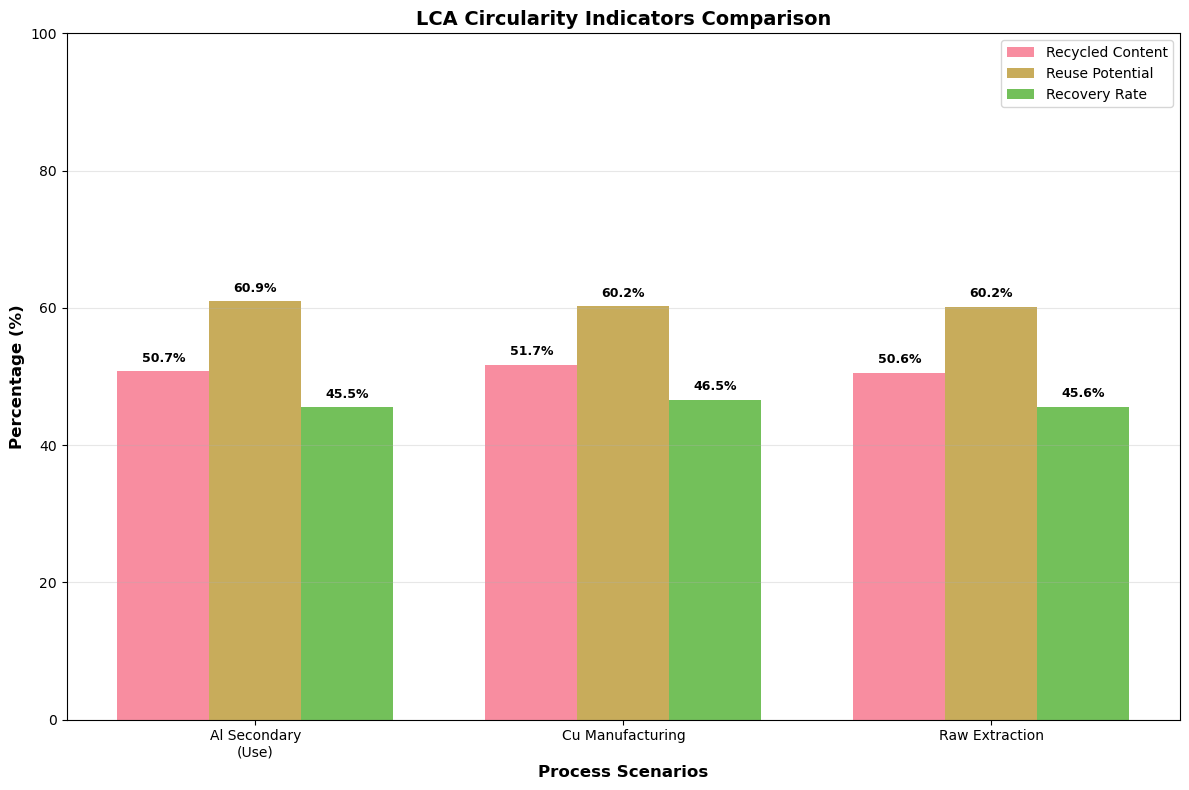

In [17]:
print("Creating Comparison Visualization...")

# Prepare data for visualization
scenarios = ['Al Secondary\n(Use)', 'Cu Manufacturing', 'Raw Extraction']
recycled_values = [recycled1, recycled2, recycled3]
reuse_values = [reuse1, reuse2, reuse3]
recovery_values = [recovery1, recovery2, recovery3]
circularity_scores = [circularity1, circularity2, circularity3]

# Create grouped bar chart
fig, ax = plt.subplots(figsize=(12, 8))

x = np.arange(len(scenarios))
width = 0.25

bars1 = ax.bar(x - width, recycled_values, width, label='Recycled Content', alpha=0.8)
bars2 = ax.bar(x, reuse_values, width, label='Reuse Potential', alpha=0.8)
bars3 = ax.bar(x + width, recovery_values, width, label='Recovery Rate', alpha=0.8)

# Customize chart
ax.set_xlabel('Process Scenarios', fontsize=12, fontweight='bold')
ax.set_ylabel('Percentage (%)', fontsize=12, fontweight='bold')
ax.set_title('LCA Circularity Indicators Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(scenarios)
ax.legend(loc='upper right')
ax.set_ylim(0, 100)
ax.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bars, values in zip([bars1, bars2, bars3], [recycled_values, reuse_values, recovery_values]):
    for bar, value in zip(bars, values):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 1,
               f'{value:.1f}%', ha='center', va='bottom', 
               fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()


BEST SCENARIO ANALYSIS
Best Performing Scenario: Cu Manufacturing
Circularity Score: 52.82%
Recycled Content: 51.73%
Reuse Potential: 60.20%
Recovery Rate: 46.53%


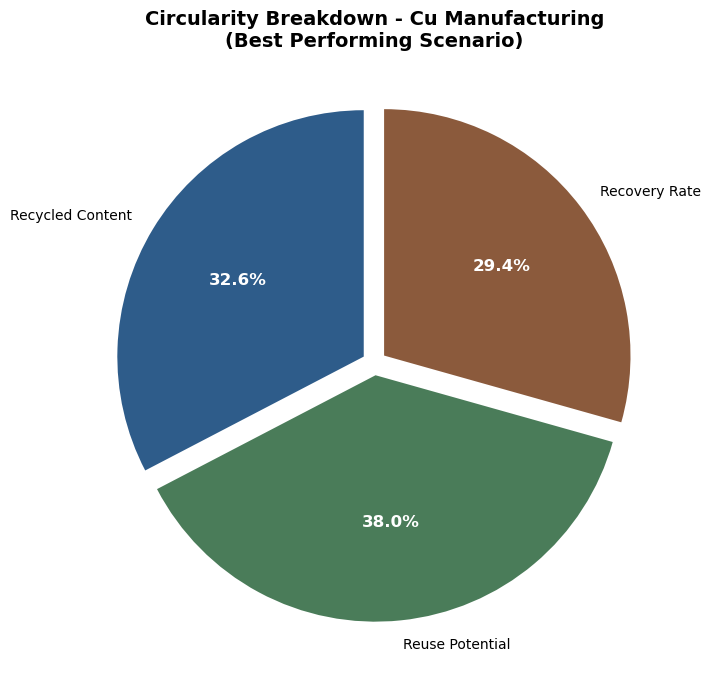

In [18]:
print("BEST SCENARIO ANALYSIS")
print("=" * 50)

# Find best performing scenario
best_idx = np.argmax(circularity_scores)
best_scenario = scenarios[best_idx]
best_circularity = circularity_scores[best_idx]
best_input = [test1_input, test2_input, test3_input][best_idx]
best_predictions = [predictions1, predictions2, predictions3][best_idx]

print(f"Best Performing Scenario: {best_scenario}")
print(f"Circularity Score: {best_circularity:.2f}%")
print(f"Recycled Content: {[recycled1, recycled2, recycled3][best_idx]:.2f}%")
print(f"Reuse Potential: {[reuse1, reuse2, reuse3][best_idx]:.2f}%")
print(f"Recovery Rate: {[recovery1, recovery2, recovery3][best_idx]:.2f}%")

# Create pie chart for best scenario
fig, ax = plt.subplots(figsize=(10, 8))

best_values = [
    [recycled1, recycled2, recycled3][best_idx],
    [reuse1, reuse2, reuse3][best_idx],
    [recovery1, recovery2, recovery3][best_idx]
]

colors = ['#2e5c8a', '#4a7c59', '#8b5a3c']
labels = ['Recycled Content', 'Reuse Potential', 'Recovery Rate']

wedges, texts, autotexts = ax.pie(best_values, labels=labels, autopct='%1.1f%%', 
                                 colors=colors, startangle=90, explode=(0.05, 0.05, 0.05))

ax.set_title(f'Circularity Breakdown - {best_scenario}\n(Best Performing Scenario)', 
             fontsize=14, fontweight='bold')

# Make percentage text bold and white
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(12)

plt.show()


In [19]:
print("TESTING AUTOFILL FEATURE")
print("=" * 50)

# Test with minimal input - system will autofill missing values
minimal_input = {
    'Raw Material Quantity (kg or unit)': 1.5,
    'Energy Input Quantity (MJ)': 30.0,
    'Process Stage': 'Manufacturing',
    'Raw Material Type': 'Aluminium Scrap'
}

# Get predictions with details about autofilled values
result_with_details = predict_with_autofill_details(minimal_input)

print(f"\nSystem auto-filled {len(result_with_details['missing_filled'])} missing fields:")
for i, field in enumerate(result_with_details['missing_filled'][:8]):
    print(f"  {i+1}. {field}: {result_with_details['filled_input'][field]}")

if len(result_with_details['missing_filled']) > 8:
    print(f"  ... and {len(result_with_details['missing_filled']) - 8} more fields")

print(f"\nPredictions with auto-filled data:")
for key, value in result_with_details['predictions'].items():
    print(f"  {key}: {value:.2f}%")

minimal_circularity = sum(result_with_details['predictions'].values()) / 3
print(f"  Overall Circularity: {minimal_circularity:.2f}%")

print("\nAutofill feature working successfully")



TESTING AUTOFILL FEATURE
Models loaded successfully! Available models: ['recycled_content', 'reuse_potential', 'recovery_rate']
Creating new label encoders with mappings from your data...
Expected columns: 27
Actual columns: 27
Column order match: True
Preprocessed data shape: (1, 27)
Feature names: ['Process Stage', 'Technology', 'Time Period', 'Location', 'Functional Unit', 'Raw Material Type', 'Raw Material Quantity (kg or unit)', 'Energy Input Type', 'Energy Input Quantity (MJ)', 'Transport Mode', 'Transport Distance (km)', 'Fuel Type', 'Emissions to Air CO2 (kg)', 'Emissions to Air SOx (kg)', 'Emissions to Air NOx (kg)', 'Emissions to Air Particulate Matter (kg)', 'Emissions to Water BOD (kg)', 'Emissions to Water Heavy Metals (kg)', 'Greenhouse Gas Emissions (kg CO2-eq)', 'End-of-Life Treatment', 'Energy_per_Material', 'Total_Air_Emissions', 'Total_Water_Emissions', 'Circularity_Score', 'Transport_Intensity', 'GHG_per_Material', 'Time_Period_Numeric']

System auto-filled 16 missi

In [20]:
print("GENERATING PDF REPORT")
print("=" * 50)

# Generate report for best performing scenario
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
report_filename = f"LCA_Report_{best_scenario.replace(' ', '_').replace('\\n', '_')}_{timestamp}.pdf"

print(f"Generating comprehensive PDF report...")
print(f"Scenario: {best_scenario}")
print(f"Filename: {report_filename}")

try:
    report_path = generate_enhanced_lca_report(
        model_predictions=best_predictions,
        input_parameters=best_input,
        output_file=report_filename
    )
    
    print(f"✓ Report generated successfully!")
    print(f"File saved as: {report_path}")
    
    print(f"\nReport Contents:")
    print(f"  Executive Summary")
    print(f"  Input Parameters Analysis")
    print(f"  LCA Results with Predictions")
    print(f"  Circularity Analysis")
    print(f"  Environmental Impact Assessment")
    print(f"  Actionable Recommendations")
    print(f"  Model Performance Metrics")
    
except Exception as e:
    print(f"⚠ Error generating report: {e}")
    print("This might be due to missing ReportLab library.")
    print("Install with: pip install reportlab")


GENERATING PDF REPORT
Generating comprehensive PDF report...
Scenario: Cu Manufacturing
Filename: LCA_Report_Cu_Manufacturing_20250907_115434.pdf
✓ Report generated successfully!
File saved as: LCA_Report_Cu_Manufacturing_20250907_115434.pdf

Report Contents:
  Executive Summary
  Input Parameters Analysis
  LCA Results with Predictions
  Circularity Analysis
  Environmental Impact Assessment
  Actionable Recommendations
  Model Performance Metrics
